In [17]:
from time import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

# digits = datasets.load_digits(n_class=6)
# X = digits.data
# y = digits.target
# n_samples, n_features = X.shape
# n_neighbors = 30




In [18]:
df_e10 = pd.read_csv('e10.csv')
df_e12 = pd.read_csv('e12.csv')
# df_e12labls = pdf.read_csv('cell.identity.csv')

combined = pd.concat([df_e10,df_e12])
combined = combined.drop(combined.columns[0], axis=1)
print combined.shape
print combined.values

(144, 15801)
[[  0 113   0 ...,  91   0 195]
 [  0 100 157 ..., 211   0 160]
 [  0 157  99 ..., 592   0  30]
 ..., 
 [  0  11   0 ...,   4   0   0]
 [  0   6   0 ...,   0   0   0]
 [  0 256   0 ...,  43   0   0]]


In [19]:
# print digits.data.shape

In [20]:
#----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
#     for i in range(X.shape[0]):
#         plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
#                  color=plt.cm.Set1(y[i] / 10.),
#                  fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)



Computing t-SNE embedding


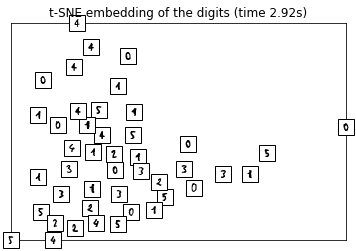

In [21]:
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()


X_tsne = tsne.fit_transform(combined.values)

plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

plt.show()